Simon Hobbs, 30-Jun-2024

CS416 Narrative Visualisation Project

Exploratory Data Analysis & Transformation

# Library Imports

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
sns.set_style('whitegrid')

# Load Data

In [239]:
df_whr = pd.read_csv("data/_LOCALONLY/WHR24-VsTime-DataForTable2.1.csv")
df_whr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


# Pivot

In [240]:
df_whr_long = df_whr.set_index(['Country name','year'])

In [241]:
df_whr_long = df_whr_long.stack().reset_index()
df_whr_long.columns = ['country','year','indicator','value']
df_whr_long

,country,year,indicator,value
0,Afghanistan,2008,Life Ladder,3.724
1,Afghanistan,2008,Log GDP per capita,7.350
2,Afghanistan,2008,Social support,0.451
3,Afghanistan,2008,Healthy life expectancy at birth,50.500
4,Afghanistan,2008,Freedom to make life choices,0.718
...,...,...,...,...
20876,Zimbabwe,2023,Freedom to make life choices,0.735
20877,Zimbabwe,2023,Generosity,-0.069
20878,Zimbabwe,2023,Perceptions of corruption,0.757
20879,Zimbabwe,2023,Positive affect,0.610


In [242]:
df_whr_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20881 entries, 0 to 20880
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    20881 non-null  object 
 1   year       20881 non-null  int64  
 2   indicator  20881 non-null  object 
 3   value      20881 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 652.7+ KB


# Visualisations

## Vs Time

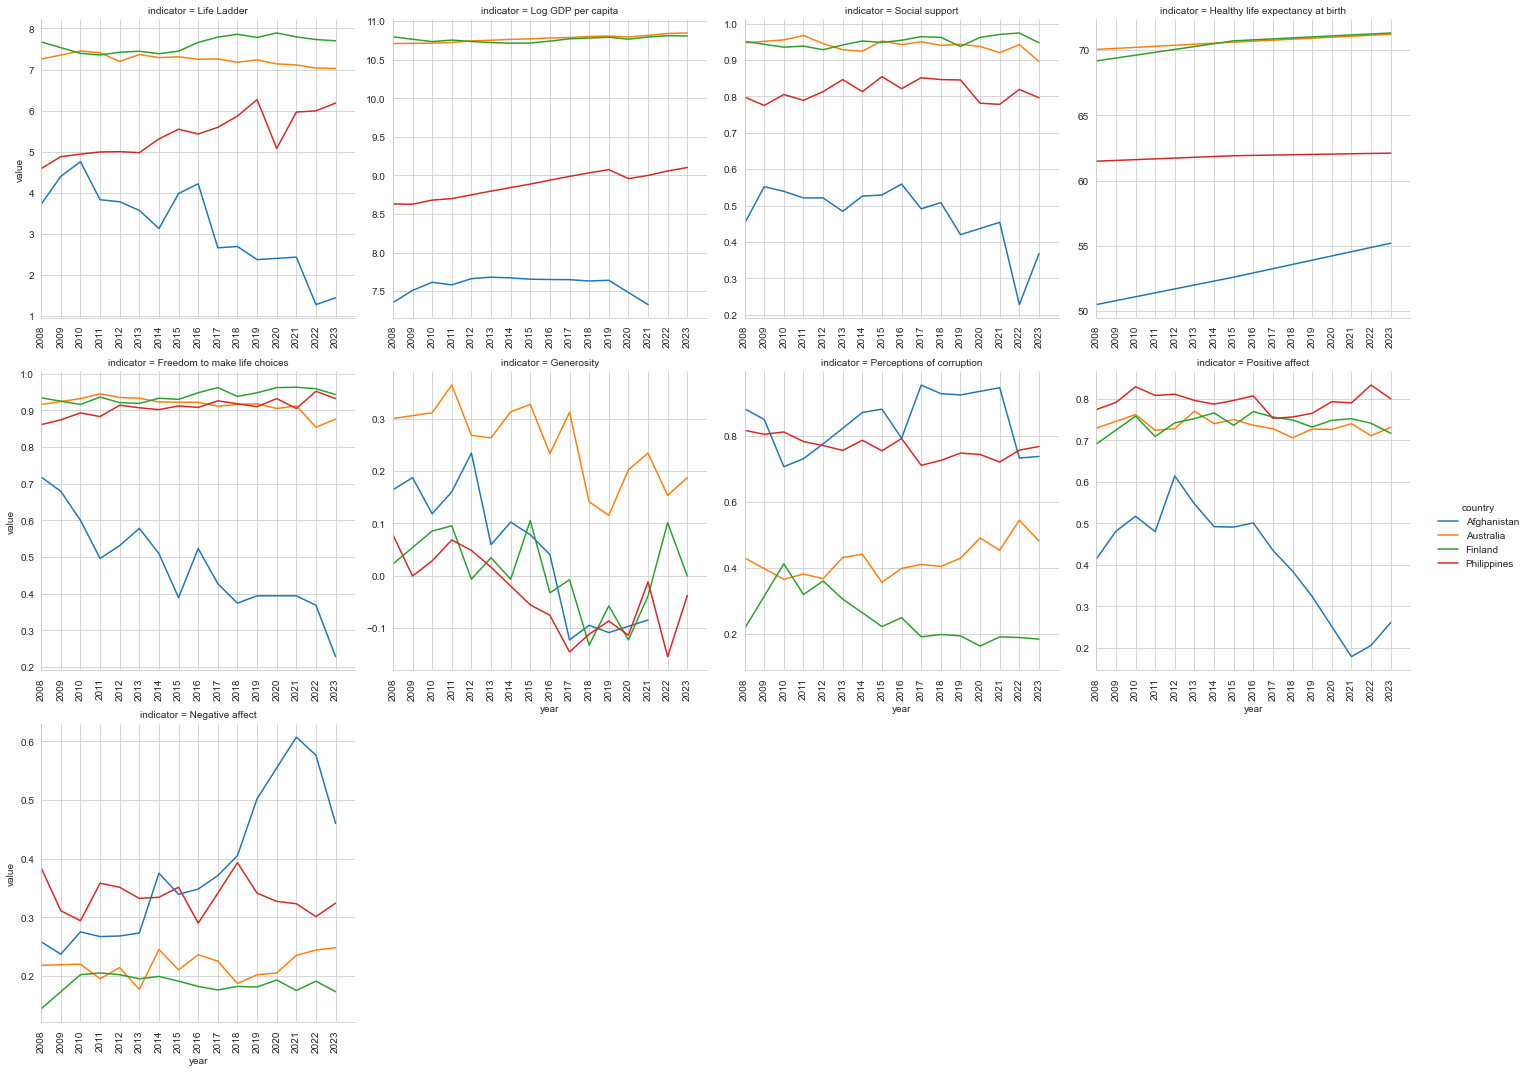

In [272]:
df_plot = df_whr_long.loc[df_whr_long.country.isin([
    'Australia',
    #'Denmark',
    #'United States',
    'Finland',    # Happiest
    'Afghanistan',  # Unhappiest
    #'Lebanon',  # 2nd Unhappiest
    #'India',
    #'China',
    #'Philippines',  # Big happiness increase
    #'Serbia', # Big happiness increase
])]

g = sns.relplot(data=df_plot, y='value',x='year', hue='country', col='indicator', col_wrap=4, kind='line',facet_kws=dict(sharey=False))

#g.set(ylim=(0,None))

g.set(xticks=np.arange(min(df_plot.year),max(df_plot.year+1),1))
g.set_xticklabels(np.arange(min(df_plot.year),max(df_plot.year+1),1), rotation=90)
g.set(xlim=(2008,2024))

g.tight_layout()

for ax in g.axes.flatten():
    ax.tick_params(labelbottom=True)



## Scatterplots

In [244]:
df_scatterplot = df_whr.loc[
    (df_whr.year==2023) &
    (df_whr['Country name'].isin(['Australia','Lebanon','Finland']))
]

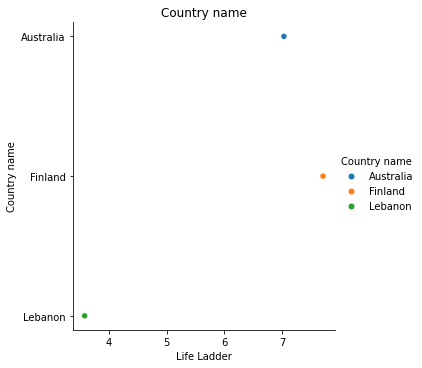

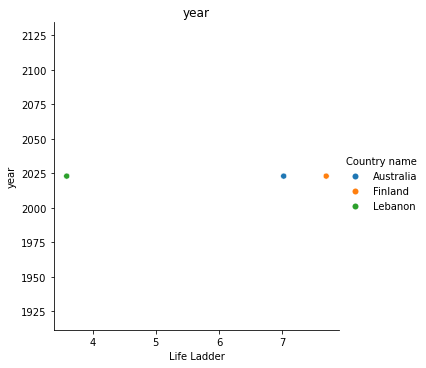

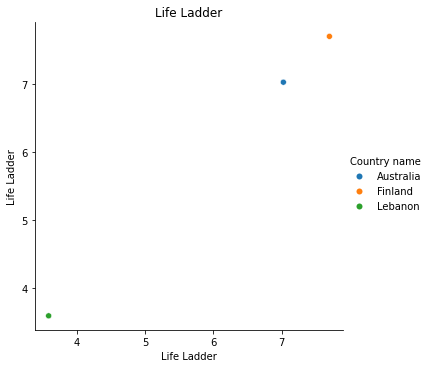

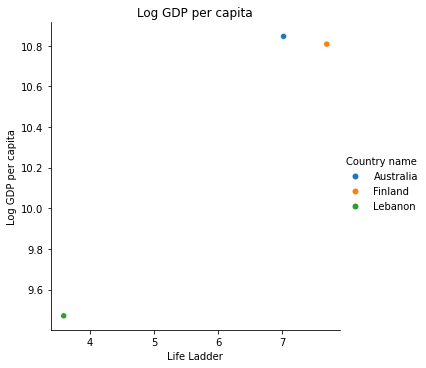

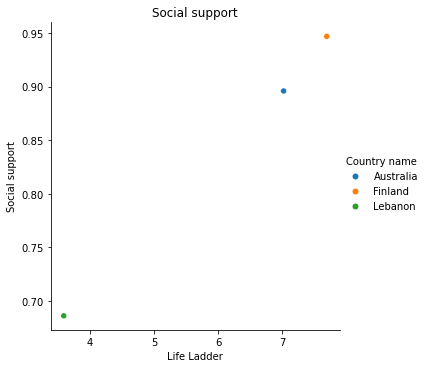

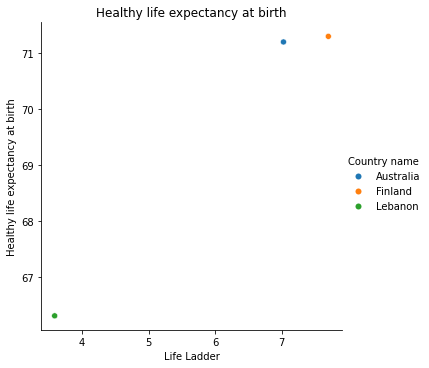

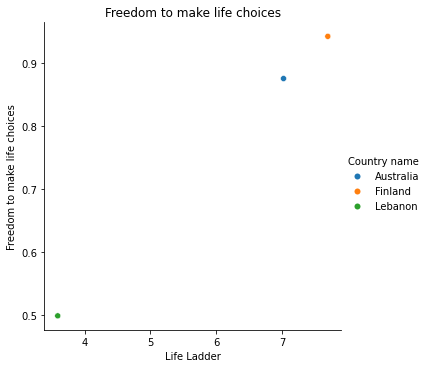

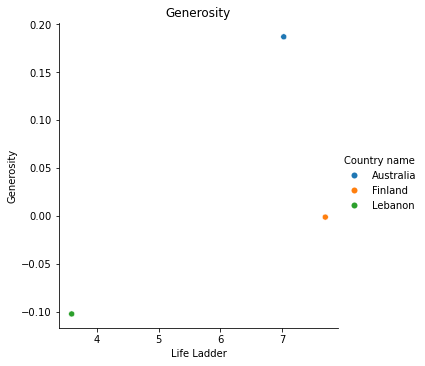

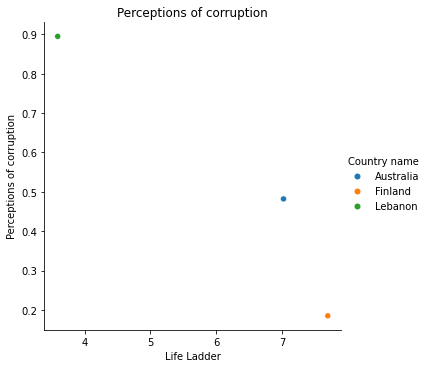

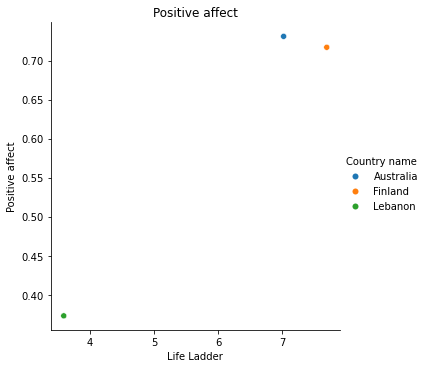

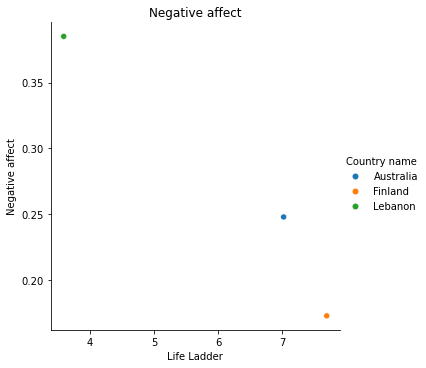

In [247]:
for indicator in df_scatterplot.columns:
    sns.relplot(data=df_scatterplot, x='Life Ladder', y=indicator, hue='Country name')
    plt.title(indicator)
    plt.show()

# Queries

## Which nation's happiness decreased the furthest?

In [217]:
def calc_ladder_drop(df, startyear, endyear):
    """
    Gets a dataframe for a single country, with multiple years & indicators. 
    Returns the difference in life ladder, between startyear & endyear. 
    """
    
    startladder = df.loc[(df.year==startyear) & (df.indicator=='Life Ladder'), 'value'].values
    endladder = df.loc[(df.year==endyear) & (df.indicator=='Life Ladder'), 'value'].values
    
    result = endladder - startladder
    
    if result.size == 0:
        result = np.NaN
    else:
        result = result.item()
    
    return result
    
#.loc[(x.year.isin([2008,2023])) & (x.indicator=='Life Ladder')]

In [218]:
df_deltaladder = df_whr.groupby(['country']).apply(lambda x: calc_ladder_drop(x,2008,2023))
df_deltaladder.name='delta_ladder'
df_deltaladder = df_deltaladder.sort_values(ascending=False).reset_index()
df_deltaladder

,country,delta_ladder
0,Philippines,1.595
1,Togo,1.557
2,Kosovo,1.356
3,China,1.299
4,El Salvador,1.291
...,...,...
160,Trinidad and Tobago,NaN
161,Tunisia,NaN
162,Turkmenistan,NaN
163,United Arab Emirates,NaN


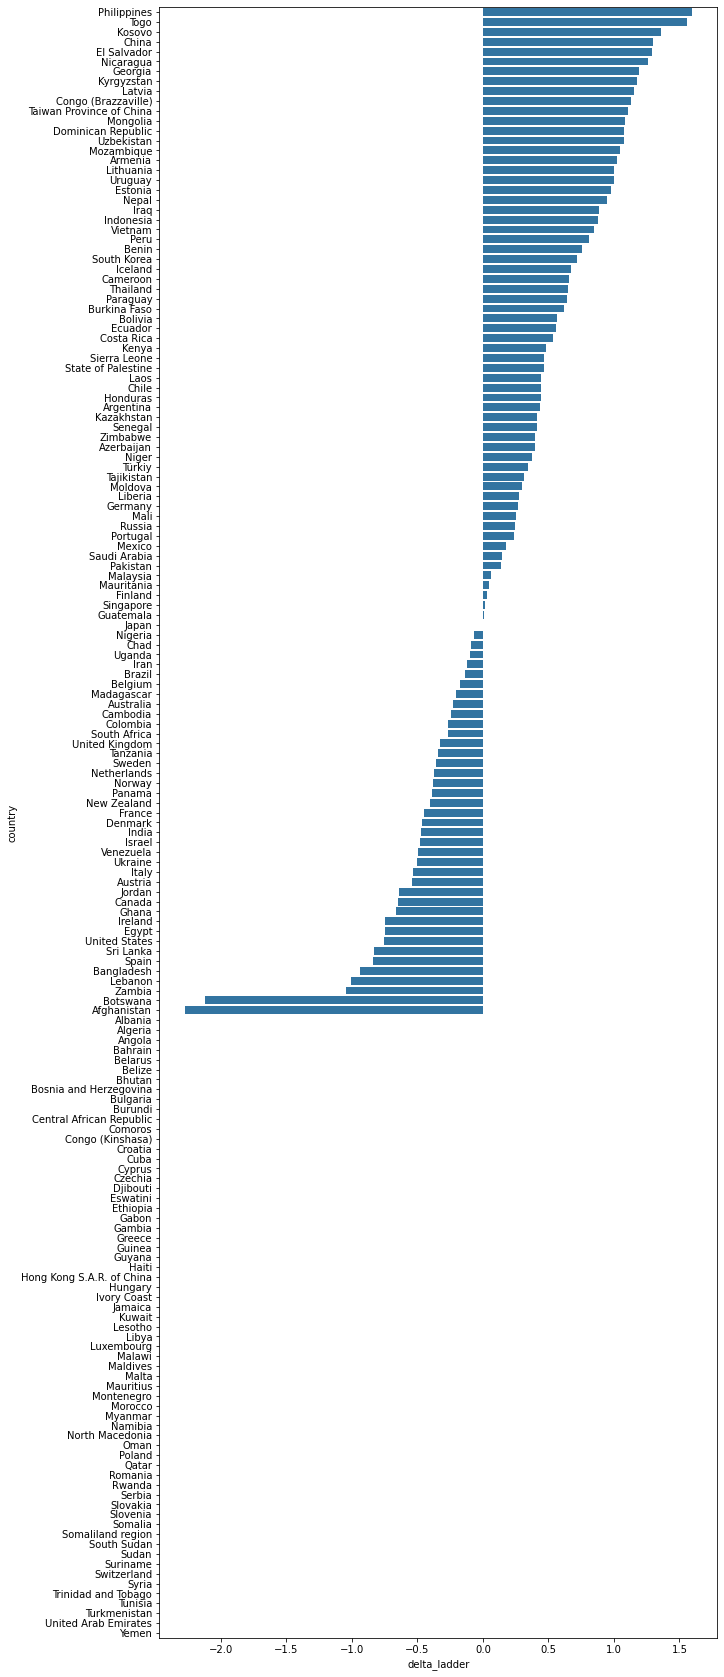

In [219]:
fig, ax = plt.subplots(1,1, figsize=(10,30))
g = sns.barplot(data=df_deltaladder, x='delta_ladder', y='country', ax=ax)
